In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from tqdm import tqdm
import librosa as lb
import warnings
warnings.filterwarnings('ignore')  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn import metrics
from sklearn.metrics import accuracy_score

Mounted at /content/drive/


#Plot feature importance function

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,30))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')    

# Dataset

In [ ]:
location_train=pd.read_csv('/content/drive/MyDrive/SHL 2021/Train/Location/Location with label.csv',low_memory=False)
location_train.head()

,Epoch time[ms],Accuracy of this location[m],Latitude[degrees],Longitude[degrees],Altitude[m],Label
0,1490431658118,64.0,50.844494,-0.132922,97.664610,4
1,1490431659760,48.0,50.844491,-0.132924,128.267900,4
2,1490431660766,48.0,50.844481,-0.132931,135.611425,4
3,1490431661765,12.0,50.844469,-0.132930,134.436050,4
4,1490431662768,32.0,50.844267,-0.132787,135.993866,4


In [ ]:
location_validation=pd.read_csv('/content/drive/MyDrive/SHL 2021/Validate/Location/Location with Label.csv',low_memory=False)
location_validation.head()

,Epoch time[ms],Accuracy of this location[m],Latitude[degrees],Longitude[degrees],Altitude[m],Label
0,1497427493721,6.0,50.826746,-0.119839,134.170604,3
1,1497427494711,6.0,50.826755,-0.119822,134.297500,3
2,1497427495712,6.0,50.826761,-0.119806,134.367085,3
3,1497427496716,6.0,50.826762,-0.119792,134.430774,3
4,1497427497996,6.0,50.826757,-0.119783,134.478630,3


In [ ]:
location_test=pd.read_csv("/content/drive/MyDrive/SHL 2021/Test/Location/Location- gonna give label.csv",low_memory=False)
location_test.drop(['Ignore1','Ignore2','ache=1+nai=0'],axis=1,inplace=True)
location_test.head()

,Epoch time[ms],Accuracy of this location[m],Latitude[degrees],Longitude[degrees],Altitude[m]
0,2496835324100,400.0,50.866564,-0.085024,104.212435
1,2496835325624,96.0,50.866559,-0.085056,103.841576
2,2496835326630,64.0,50.866547,-0.085148,104.008815
3,2496835327632,64.0,50.866538,-0.085241,104.000552
4,2496835328636,64.0,50.866518,-0.085358,103.942761


In [ ]:
print('location_train:      ',len(location_train))
print('location_validation:  ',len(location_validation))
print('location_test:       ',len(location_test))

location_train:       661081
location_validation:   63819
location_test:        463232


In [ ]:
print('train:')
print(location_train['Label'].value_counts())
print('\n')
print('validation:')
print(location_validation['Label'].value_counts())

train:
5    122555
6    119361
4    115830
2    105426
7     69228
1     51480
3     41923
8     35278
Name: Label, dtype: int64


validation:
2    15438
5    13498
4    10632
1    10348
7     7117
6     3335
8     2542
3      909
Name: Label, dtype: int64


In [ ]:
location_train.describe()

,Epoch time[ms],Accuracy of this location[m],Latitude[degrees],Longitude[degrees],Altitude[m],Label
count,6.610810e+05,661081.000000,661081.000000,661081.000000,661081.000000,661081.000000
mean,1.495348e+12,10.464726,51.038485,-0.180470,113.719009,4.458125
std,2.387496e+09,8.414389,0.394212,0.384145,54.239628,1.973879
min,1.490432e+12,2.000000,50.737946,-2.980204,-643.297744,1.000000
25%,1.493737e+12,6.000000,50.835155,-0.171631,75.846992,3.000000
50%,1.495328e+12,8.000000,50.856914,-0.133869,100.995964,5.000000
75%,1.497344e+12,12.000000,51.133551,-0.107619,136.988602,6.000000
max,1.499268e+12,400.000000,53.493308,1.056981,2714.215079,8.000000


In [ ]:
location_validation.describe()

,Epoch time[ms],Accuracy of this location[m],Latitude[degrees],Longitude[degrees],Altitude[m],Label
count,6.381900e+04,63819.000000,63819.000000,63819.000000,63819.000000,63819.000000
mean,2.661157e+12,12.416561,50.954156,0.188518,80.853789,3.825412
std,2.370729e+12,12.207367,0.212820,0.399391,31.326932,2.114772
min,1.497427e+12,2.000000,50.769645,-0.301299,-333.179016,1.000000
25%,1.497452e+12,6.000000,50.827037,-0.126175,60.854119,2.000000
50%,1.500051e+12,8.000000,50.854871,-0.054712,74.166039,4.000000
75%,1.500386e+12,16.000000,50.987251,0.576532,94.903102,5.000000
max,7.497461e+12,400.000000,51.603663,0.977293,502.083500,8.000000


In [ ]:
location_test.describe()

,Epoch time[ms],Accuracy of this location[m],Latitude[degrees],Longitude[degrees],Altitude[m]
count,4.632320e+05,463232.000000,463232.000000,463232.000000,463232.000000
mean,2.689978e+12,13.498810,50.940824,-0.006202,92.135089
std,3.925799e+11,9.228005,0.205426,0.293817,69.195780
min,2.496835e+12,2.000000,50.736817,-0.939760,-308.113556
25%,2.498639e+12,6.000000,50.825371,-0.138075,65.016939
50%,2.500197e+12,12.000000,50.840372,-0.118848,83.253006
75%,2.501256e+12,16.000000,50.932641,0.020106,108.796332
max,3.500317e+12,400.000000,51.619891,1.241499,3036.768063


In [ ]:
print('train: ')
print(location_train.isnull().sum())
print('\n')
print('validation: ')
print(location_validation.isnull().sum())
print('\n')
print('test:')
print(location_test.isnull().sum())

train: 
Epoch time[ms]                  0
Accuracy of this location[m]    0
Latitude[degrees]               0
Longitude[degrees]              0
Altitude[m]                     0
Label                           0
dtype: int64


validation: 
Epoch time[ms]                  0
Accuracy of this location[m]    0
Latitude[degrees]               0
Longitude[degrees]              0
Altitude[m]                     0
Label                           0
dtype: int64


test:
Epoch time[ms]                  0
Accuracy of this location[m]    0
Latitude[degrees]               0
Longitude[degrees]              0
Altitude[m]                     0
dtype: int64


In [ ]:
print('train: ')
print(location_train.info())
print('\n')
print('validation:')
print(location_validation.info())
print('\n')
print('test: ')
print(location_test.info())

train: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661081 entries, 0 to 661080
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Epoch time[ms]                661081 non-null  int64  
 1   Accuracy of this location[m]  661081 non-null  float64
 2   Latitude[degrees]             661081 non-null  float64
 3   Longitude[degrees]            661081 non-null  float64
 4   Altitude[m]                   661081 non-null  float64
 5   Label                         661081 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 30.3 MB
None


validation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63819 entries, 0 to 63818
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Epoch time[ms]                63819 non-null  int64  
 1   Accuracy of this location[m]  63819 non-nu

In [ ]:
x_train=location_train.iloc[:,:-1].values
x_val=location_validation.iloc[:,:-1].values
y_train=location_train['Label'].values
y_val=location_validation['Label'].values

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.32247449819019414
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10348
           2       0.69      0.03      0.05     15438
           3       0.00      0.00      0.00       909
           4       0.59      0.09      0.16     10632
           5       0.31      1.00      0.47     13498
           6       0.17      0.60      0.26      3335
           7       1.00      0.16      0.28      7117
           8       0.50      1.00      0.67      2542

    accuracy                           0.32     63819
   macro avg       0.41      0.36      0.24     63819
weighted avg       0.47      0.32      0.21     63819



#XGB Classifier

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=xgb.XGBClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.3473887086917689
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10348
           2       0.25      0.16      0.20     15438
           3       0.00      0.00      0.00       909
           4       1.00      0.23      0.37     10632
           5       0.36      1.00      0.53     13498
           6       0.13      0.38      0.19      3335
           7       0.00      0.00      0.00      7117
           8       0.52      0.97      0.68      2542

    accuracy                           0.35     63819
   macro avg       0.28      0.34      0.25     63819
weighted avg       0.33      0.35      0.26     63819



# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.3751704037982419
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10348
           2       0.10      0.04      0.06     15438
           3       0.00      0.00      0.00       909
           4       0.31      0.17      0.22     10632
           5       0.41      1.00      0.58     13498
           6       0.09      0.29      0.14      3335
           7       0.99      0.65      0.79      7117
           8       0.73      0.96      0.83      2542

    accuracy                           0.38     63819
   macro avg       0.33      0.39      0.33     63819
weighted avg       0.31      0.38      0.30     63819



#Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.3554427364891333
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10348
           2       0.00      0.00      0.00     15438
           3       0.00      0.00      0.00       909
           4       0.69      0.30      0.42     10632
           5       0.35      1.00      0.52     13498
           6       0.13      0.46      0.20      3335
           7       0.87      0.27      0.41      7117
           8       0.50      0.99      0.67      2542

    accuracy                           0.36     63819
   macro avg       0.32      0.38      0.28     63819
weighted avg       0.31      0.36      0.26     63819



#AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf= AdaBoostClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.2585750325138282
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10348
           2       0.00      0.00      0.00     15438
           3       0.00      0.00      0.00       909
           4       0.14      0.24      0.18     10632
           5       0.51      0.88      0.65     13498
           6       0.09      0.63      0.16      3335
           7       0.00      0.00      0.00      7117
           8       0.00      0.00      0.00      2542

    accuracy                           0.26     63819
   macro avg       0.09      0.22      0.12     63819
weighted avg       0.14      0.26      0.17     63819



#CatBoost Classifier

In [ ]:
!pip3 install catboost
from catboost import CatBoostClassifier
clf= CatBoostClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

In [ ]:
print(accuracy_score(y_val,y_pred))
print(metrics.classification_report(y_val, y_pred))

0.32114260643382064
              precision    recall  f1-score   support

           1       0.16      0.01      0.02     10348
           2       0.41      0.02      0.04     15438
           3       0.00      0.00      0.00       909
           4       0.41      0.49      0.45     10632
           5       0.31      0.94      0.47     13498
           6       0.07      0.14      0.09      3335
           7       0.02      0.00      0.00      7117
           8       0.80      0.68      0.74      2542

    accuracy                           0.32     63819
   macro avg       0.27      0.29      0.23     63819
weighted avg       0.30      0.32      0.22     63819



# Feature Extraction

In [ ]:
class feature_extraction:
  def __init__(self,path,window_len,overlap,up):
    self.path=path
    self.window_len=window_len
    self.overlap=overlap
    self.up=up

  def load_data(self):
        df = pd.read_csv(self.path,low_memory=False)
        df['lat[r]']=np.radians(df['Latitude[degrees]'])
        df['lon[r]']=np.radians(df['Longitude[degrees]'])
        df['dlon']=df['lon[r]'].diff()
        df['dlat']=df['lat[r]'].diff()
        df['dlon'][0]=df['dlon'][1]
        df['dlat'][0]=df['dlat'][1]
        temp=df.iloc[1:,6]
        temp.reset_index(drop=True,inplace=True)
        s_temp=pd.Series(temp[len(temp)-1])
        a= (np.sin(df['dlat']/2))**2+(np.cos(df['lat[r]'])*np.cos(temp)*np.sin(df['dlon']/2)**2)
        c=2*np.arcsin(np.sqrt(a))
        df['hav_dist']=6371*c*1000
        df['time']=df['Epoch time[ms]'].diff()
        df['time'].fillna(df['time'].mean(),inplace=True)
        df['time']=df['time']/1000
        df['avg_speed[m/s]']=df['hav_dist']/df['time']
        df['acc']=df['avg_speed[m/s]'].diff()
        df['acc']=df['acc'].fillna(df['acc'].mean())
        df['acc']=df['acc']/df['time']
        df['acc']=np.abs(df['acc'])
        df.drop(['lat[r]','lon[r]','dlon','dlat','time'],axis=1,inplace=True)
        if self.up==1:
          df_majority1=df[df['Label']==5]
          df_majority2=df[df['Label']==6]
          df_majority3=df[df['Label']==4]
          df_majority4=df[df['Label']==2]
          df_majority5=df[df['Label']==8]
          df_majority6=df[df['Label']==1]
          df_majority=pd.concat([df_majority1,df_majority2,df_majority3,df_majority4,df_majority5,df_majority6])
          df_minority1=df[df['Label']==7]
          df_minority2=df[df['Label']==3]
          df_minority_up1=resample(df_minority1,replace=True,n_samples=100000)
          df_minority_up2=resample(df_minority2,replace=True,n_samples=100000)
          df_upsampled=pd.concat([df_majority,df_minority_up1,df_minority_up2])
          df_upsampled=df_upsampled.sort_index()
          df_upsampled.reset_index(inplace=True,drop=True)
          df=df_upsampled
        return df


  def process_label(self,df):
        label = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - \
        (int(np.floor(self.window_len /delta)) - 1)
        for t in tqdm(range(num_window), desc='Processing The Label File   '):
            x = df.loc[d:(d + self.window_len), 'Label'].to_numpy()
            d = d + delta
            temp = np.array([sp.stats.mode(x)[0]])
            if t == 0:
                label = temp
            else:
                label = np.concatenate([label, temp])
        return label

  def get_statistical_features(self, df, axis='Accuracy of this location[m]'):
        features = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - \
        (int(np.floor(self.window_len /delta)) - 1)
        for t in tqdm(range(num_window), desc='Calculating ' + axis +  ' Axis Features '):
            x = df.loc[d:(d + self.window_len), axis].to_numpy()
            d = d + delta
            min = np.min(x)
            max = np.max(x)
            std = np.std(x)
            avg = np.mean(x)
            var = np.var(x)
            ptp = np.ptp(x)
            mrc = np.max(np.diff(x))
            arc = np.mean(np.diff(x))
            src = np.std(np.diff(x))
            mad = sp.stats.median_absolute_deviation(x)
            iqr = sp.stats.iqr(x)
            cor = np.correlate(x, x)[0]
            rms = np.sum(np.square(x)) / x.shape[0]
            vel = np.trapz(x) / x.shape[0]
            temp = np.array([[min, max, std, avg, var, ptp, mrc, arc,
                            src, mad, iqr, cor, rms, vel]])
            if t == 0:
                features = temp
            else:
                features = np.concatenate([features, temp])
        return features


  def get_time(self, df):
        features = []
        d = 0
        delta = int(np.floor(self.window_len * (1 - self.overlap)))
        num_window = int(np.floor(df.shape[0] / delta)) - \
        (int(np.floor(self.window_len /delta)) - 1)
        for t in tqdm(range(num_window), desc='Calculating ' + 'Epoch time[ms]' +  ' Axis Features '):
            x = df.loc[d:(d + self.window_len), 'Epoch time[ms]'].to_numpy()
            d = d + delta
            min = np.min(x)
            max = np.max(x)
            std = np.std(x)
            avg = np.mean(x)
            var = np.var(x)
            temp = np.array([[min, max, std, avg, var]])
            if t == 0:
                features = temp
            else:
                features = np.concatenate([features, temp])
        return features


  def extract(self, labelled=True):
        df = self.load_data()
        stat_time=self.get_time(df)
        stat_lat = self.get_statistical_features(df, axis='Latitude[degrees]')
        stat_long = self.get_statistical_features(df, axis='Longitude[degrees]')
        stat_alt = self.get_statistical_features(df, axis='Altitude[m]')
        stat_hav_dist=self.get_statistical_features(df,axis='hav_dist')
        stat_avgspeed=self.get_statistical_features(df,axis='avg_speed[m/s]')
        stat_avgacc=self.get_statistical_features(df,axis='acc')

        if labelled:
            label = self.process_label(df)
            features = np.concatenate([stat_time,stat_lat, stat_long,stat_alt,stat_hav_dist,stat_avgspeed,stat_avgacc,label], axis=1)
        else:
            features = np.concatenate([stat_time,stat_lat, stat_long,stat_alt,stat_hav_dist,stat_avgspeed,stat_avgacc], axis=1)       
        return features

# Train

In [ ]:
path = '/content/drive/MyDrive/COMPETITIONS/SHL 2021/Train/Location/Location with label.csv'
fe = feature_extraction(path, window_len=30, overlap=0,up=0)
features = fe.extract()

Processing The Label File   : 100%|██████████| 22036/22036 [00:05<00:00, 3692.60it/s]


In [ ]:
df_train = pd.DataFrame(features)
column_names='time_min time_max time_std time_avg time_var \
              Latitude[degrees]_min Latitude[degrees]_max Latitude[degrees]_std Latitude[degrees]_avg Latitude[degrees]_var Latitude[degrees]_ptp Latitude[degrees]_mrc Latitude[degrees]_arc Latitude[degrees]_src Latitude[degrees]_mad Latitude[degrees]_iqr Latitude[degrees]_cor Latitude[degrees]_rms Latitude[degrees]_vel \
              Longitude[degrees]_min Longitude[degrees]_max Longitude[degrees]_std Longitude[degrees]_avg Longitude[degrees]_var Longitude[degrees]_ptp Longitude[degrees]_mrc Longitude[degrees]_arc Longitude[degrees]_src Longitude[degrees]_mad Longitude[degrees]_iqr Longitude[degrees]_cor Longitude[degrees]_rms Longitude[degrees]_vel \
              Altitude[m]_min Altitude[m]_max Altitude[m]_std Altitude[m]_avg Altitude[m]_var Altitude[m]_ptp Altitude[m]_mrc Altitude[m]_arc Altitude[m]_src Altitude[m]_mad Altitude[m]_iqr Altitude[m]_cor Altitude[m]_rms Altitude[m]_vel \
              hav_dist_min hav_dist_max hav_dist_std hav_dist_avg hav_dist_var hav_dist_ptp hav_dist_mrc hav_dist_arc hav_dist_src hav_dist_mad hav_dist_iqr hav_dist_cor hav_dist_rms hav_dist_vel \
              avg_speed[m/s]_min avg_speed[m/s]_max avg_speed[m/s]_std avg_speed[m/s]_avg avg_speed[m/s]_var avg_speed[m/s]_ptp avg_speed[m/s]_mrc avg_speed[m/s]_arc avg_speed[m/s]_src avg_speed[m/s]_mad avg_speed[m/s]_iqr avg_speed[m/s]_cor avg_speed[m/s]_rms avg_speed[m/s]_vel \
              avg_acc_min avg_acc_max avg_acc_std avg_acc_avg avg_acc_var avg_acc_ptp avg_acc_mrc avg_acc_arc avg_acc_src avg_acc_mad avg_acc_iqr avg_acc_cor avg_acc_rms avg_acc_vel \
              label'
df_train.columns = column_names.split()
fill_mean = lambda col : col.fillna(col.mean())
df_train= df_train.apply(fill_mean, axis = 0)

# Validation

In [ ]:
path_val = '/content/drive/MyDrive/COMPETITIONS/SHL 2021/Validate/Location/Location with Label.csv'
fe2 = feature_extraction(path_val, window_len=30, overlap=0,up=0)
features = fe2.extract()

Processing The Label File   : 100%|██████████| 2127/2127 [00:00<00:00, 3789.62it/s]


In [ ]:
df_val = pd.DataFrame(features)
column_names='time_min time_max time_std time_avg time_var \
              Latitude[degrees]_min Latitude[degrees]_max Latitude[degrees]_std Latitude[degrees]_avg Latitude[degrees]_var Latitude[degrees]_ptp Latitude[degrees]_mrc Latitude[degrees]_arc Latitude[degrees]_src Latitude[degrees]_mad Latitude[degrees]_iqr Latitude[degrees]_cor Latitude[degrees]_rms Latitude[degrees]_vel \
              Longitude[degrees]_min Longitude[degrees]_max Longitude[degrees]_std Longitude[degrees]_avg Longitude[degrees]_var Longitude[degrees]_ptp Longitude[degrees]_mrc Longitude[degrees]_arc Longitude[degrees]_src Longitude[degrees]_mad Longitude[degrees]_iqr Longitude[degrees]_cor Longitude[degrees]_rms Longitude[degrees]_vel \
              Altitude[m]_min Altitude[m]_max Altitude[m]_std Altitude[m]_avg Altitude[m]_var Altitude[m]_ptp Altitude[m]_mrc Altitude[m]_arc Altitude[m]_src Altitude[m]_mad Altitude[m]_iqr Altitude[m]_cor Altitude[m]_rms Altitude[m]_vel \
              hav_dist_min hav_dist_max hav_dist_std hav_dist_avg hav_dist_var hav_dist_ptp hav_dist_mrc hav_dist_arc hav_dist_src hav_dist_mad hav_dist_iqr hav_dist_cor hav_dist_rms hav_dist_vel \
              avg_speed[m/s]_min avg_speed[m/s]_max avg_speed[m/s]_std avg_speed[m/s]_avg avg_speed[m/s]_var avg_speed[m/s]_ptp avg_speed[m/s]_mrc avg_speed[m/s]_arc avg_speed[m/s]_src avg_speed[m/s]_mad avg_speed[m/s]_iqr avg_speed[m/s]_cor avg_speed[m/s]_rms avg_speed[m/s]_vel \
              avg_acc_min avg_acc_max avg_acc_std avg_acc_avg avg_acc_var avg_acc_ptp avg_acc_mrc avg_acc_arc avg_acc_src avg_acc_mad avg_acc_iqr avg_acc_cor avg_acc_rms avg_acc_vel \
              label'
df_val.columns = column_names.split()
#df_val.fillna(0,inplace=True)
fill_mean = lambda col : col.fillna(col.mean())
df_val= df_val.apply(fill_mean, axis = 0)

# Final data

In [ ]:
x_train=df_train.iloc[:,:-1].values
y_train=df_train.loc[:,'label'].values
x_val=df_val.iloc[:,:-1].values
y_val=df_val.loc[:,'label'].values
columns=df_train.iloc[:,:-1].columns

# 1. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
clf1= RandomForestClassifier(n_estimators=300)
scoring = 'accuracy'


clf1.fit(x_train,y_train)
test_pred=clf1.predict(x_val)

In [ ]:
from sklearn.metrics import confusion_matrix

cm=metrics.confusion_matrix(y_val,test_pred)
print(cm)

[[287  12   0   4   4   1  33   1]
 [ 39 456   2   3   5   5   4   2]
 [  0   1  27   2   0   0   0   0]
 [  8  19  86 228   4   9   1   0]
 [  8   5   0  11 404   6  15   0]
 [  1   0   0   9  36  66   0   0]
 [  7   2   0   3 101   6 108  12]
 [  0   0   0   0   0   0   0  84]]


In [ ]:
 import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in ['Stil','Walking','Run','Bike', 'Car', 'Bus', 'Train','Subway']],
                  columns = [i for i in ['Stil','Walking','Run','Bike', 'Car', 'Bus', 'Train','Subway']])
plt.figure(figsize = (7,8))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
sn.heatmap(df_cm, annot=True,fmt=".1f")
plt.savefig(fname="confusion matrix-Location.png",dpi=600)

In [ ]:
import pickle
filename = 'SHL_model.sav'
pickle.dump(clf1, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_val, y_val)
print(result)

0.7813822284908322


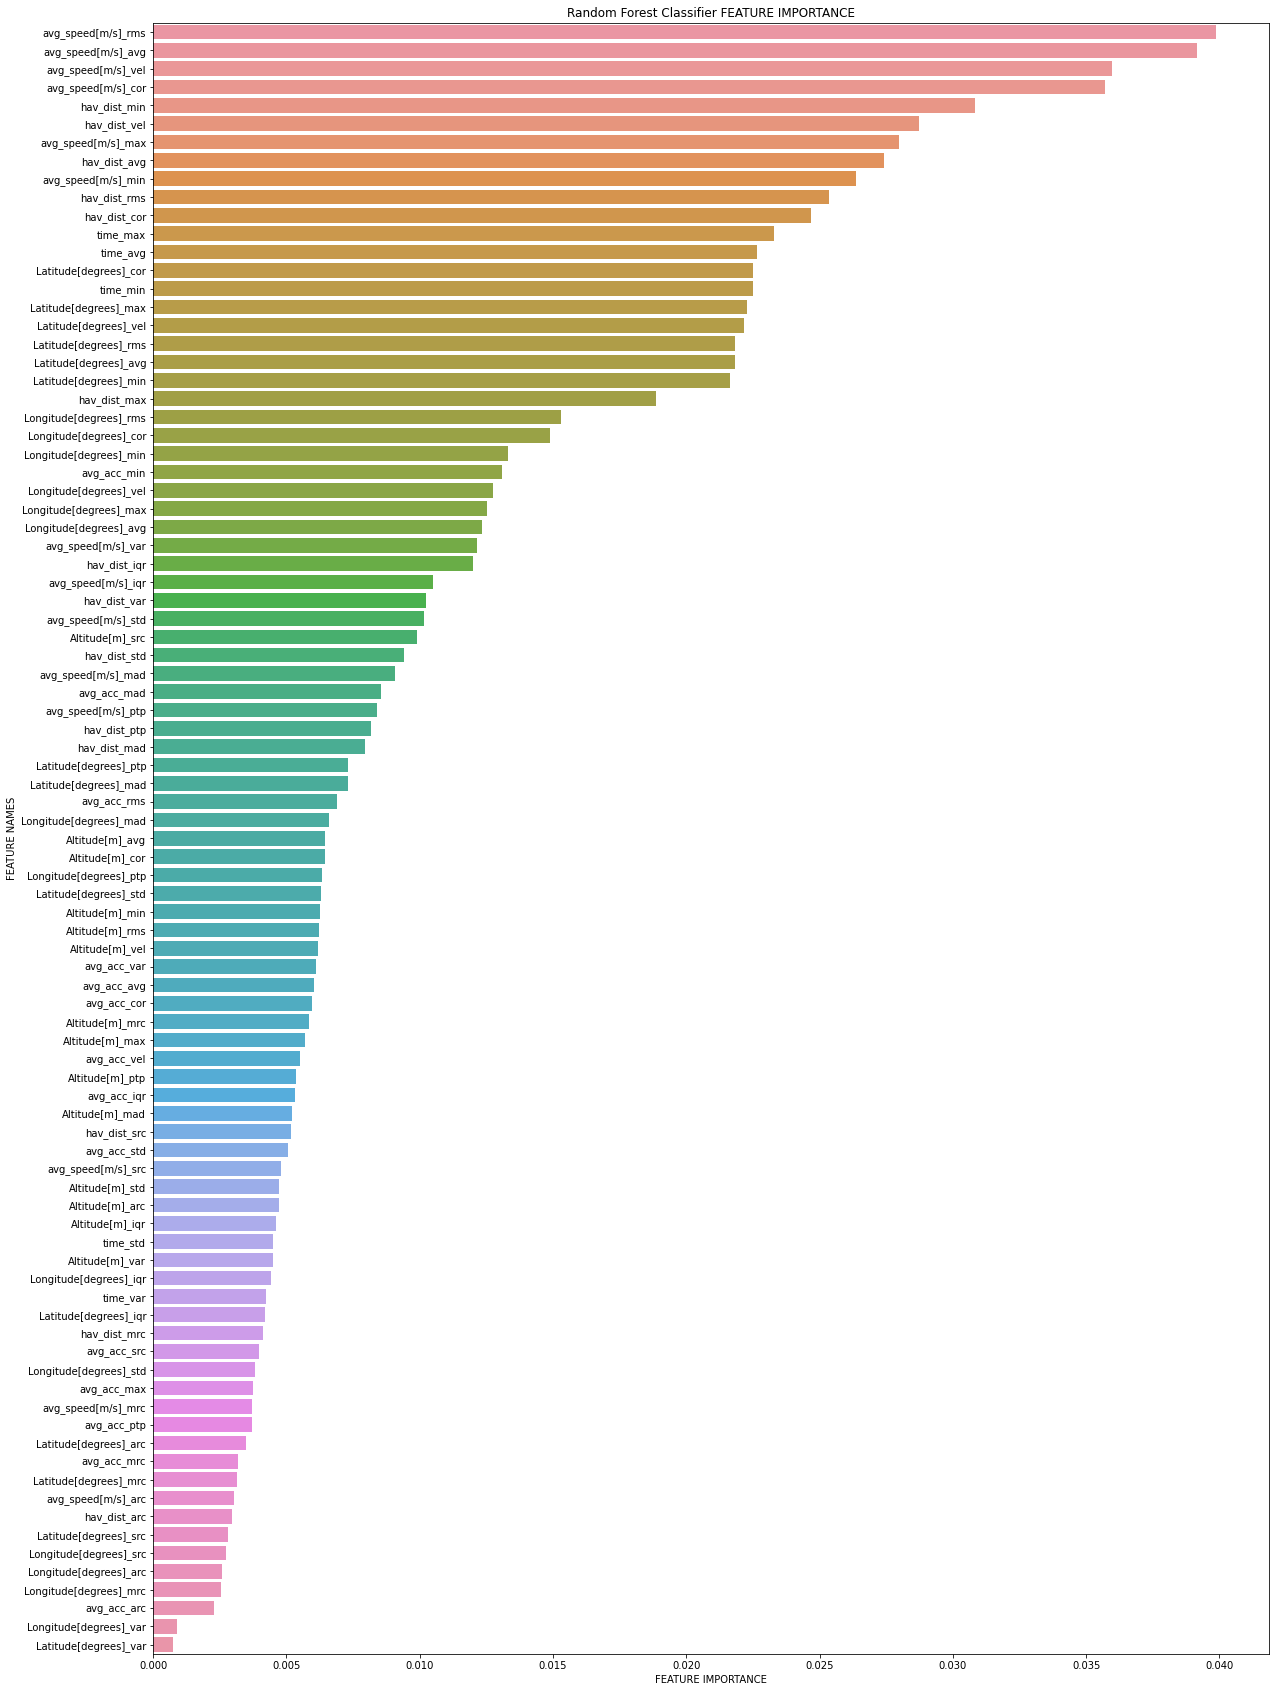

In [ ]:
plot_feature_importance(clf1.feature_importances_,columns,'Random Forest Classifier')

# 2. XGBoost Classifier

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf2 = xgb.XGBClassifier(n_estimators=300)
scoring = 'accuracy'


clf2.fit(x_train,y_train)

train_pred=clf2.predict(x_train)
print(f1_score(y_train, train_pred,average='weighted'))

test_pred=clf2.predict(x_val)
print(f1_score(y_val, test_pred,average='weighted'))

print(accuracy_score(y_val,test_pred))

print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_val, test_pred))

0.989716583583519
0.6854335673725493
0.7230841560883874
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.98      1716
         2.0       0.99      0.99      0.99      3522
         3.0       0.99      0.99      0.99      1397
         4.0       0.99      0.98      0.99      3860
         5.0       1.00      0.99      1.00      4084
         6.0       0.98      0.99      0.99      3975
         7.0       1.00      0.98      0.99      2305
         8.0       1.00      1.00      1.00      1177

    accuracy                           0.99     22036
   macro avg       0.99      0.99      0.99     22036
weighted avg       0.99      0.99      0.99     22036

              precision    recall  f1-score   support

         1.0       0.86      0.82      0.84       342
         2.0       0.87      0.90      0.88       516
         3.0       0.24      0.97      0.39        30
         4.0       0.88      0.56      0.68       355
         5.0       0.5

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf2 = xgb.XGBClassifier(n_estimators=2000)
clf2.fit(x_train, y_train,
        eval_set=[(x_val,y_val)],
        verbose=50, early_stopping_rounds=100)

In [ ]:
y_pred=clf2.predict(x_val)
print(accuracy_score(y_val,y_pred))

print(metrics.classification_report(y_val, y_pred))

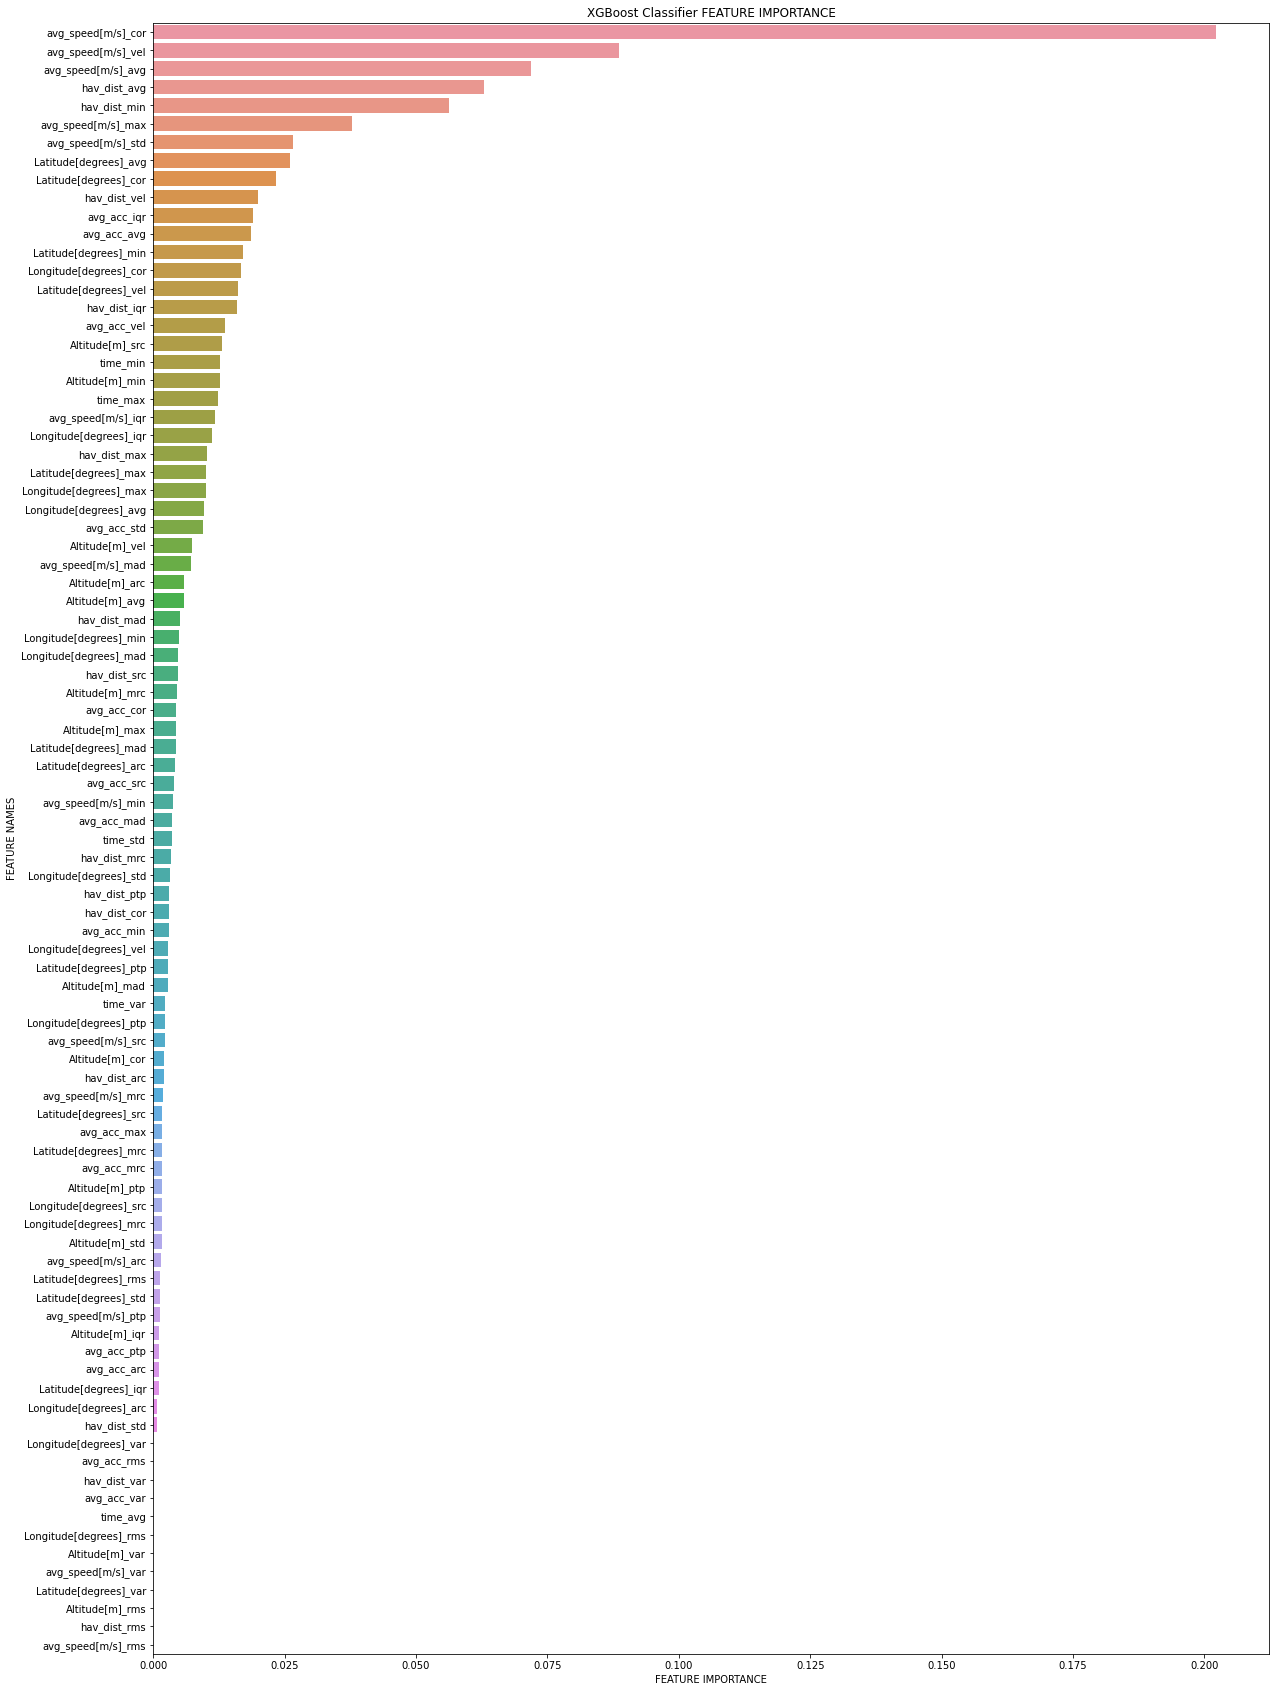

In [ ]:
plot_feature_importance(clf2.feature_importances_,columns,'XGBoost Classifier')

# 3. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf3= DecisionTreeClassifier()
scoring = 'accuracy'
#score = cross_val_score(clf3, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
#print(score)

clf3.fit(x_train,y_train)

train_pred=clf3.predict(x_train)
print(f1_score(y_train, train_pred,average='weighted'))

test_pred=clf3.predict(x_val)
print(f1_score(y_val, test_pred,average='weighted'))

print(accuracy_score(y_val,test_pred))

print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_val, test_pred))

1.0
0.6469354648019106
0.6403385049365303
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1716
         2.0       1.00      1.00      1.00      3522
         3.0       1.00      1.00      1.00      1397
         4.0       1.00      1.00      1.00      3860
         5.0       1.00      1.00      1.00      4084
         6.0       1.00      1.00      1.00      3975
         7.0       1.00      1.00      1.00      2305
         8.0       1.00      1.00      1.00      1177

    accuracy                           1.00     22036
   macro avg       1.00      1.00      1.00     22036
weighted avg       1.00      1.00      1.00     22036

              precision    recall  f1-score   support

         1.0       0.77      0.68      0.72       342
         2.0       0.86      0.80      0.83       516
         3.0       0.21      0.87      0.34        30
         4.0       0.59      0.47      0.53       355
         5.0       0.61      0.70   

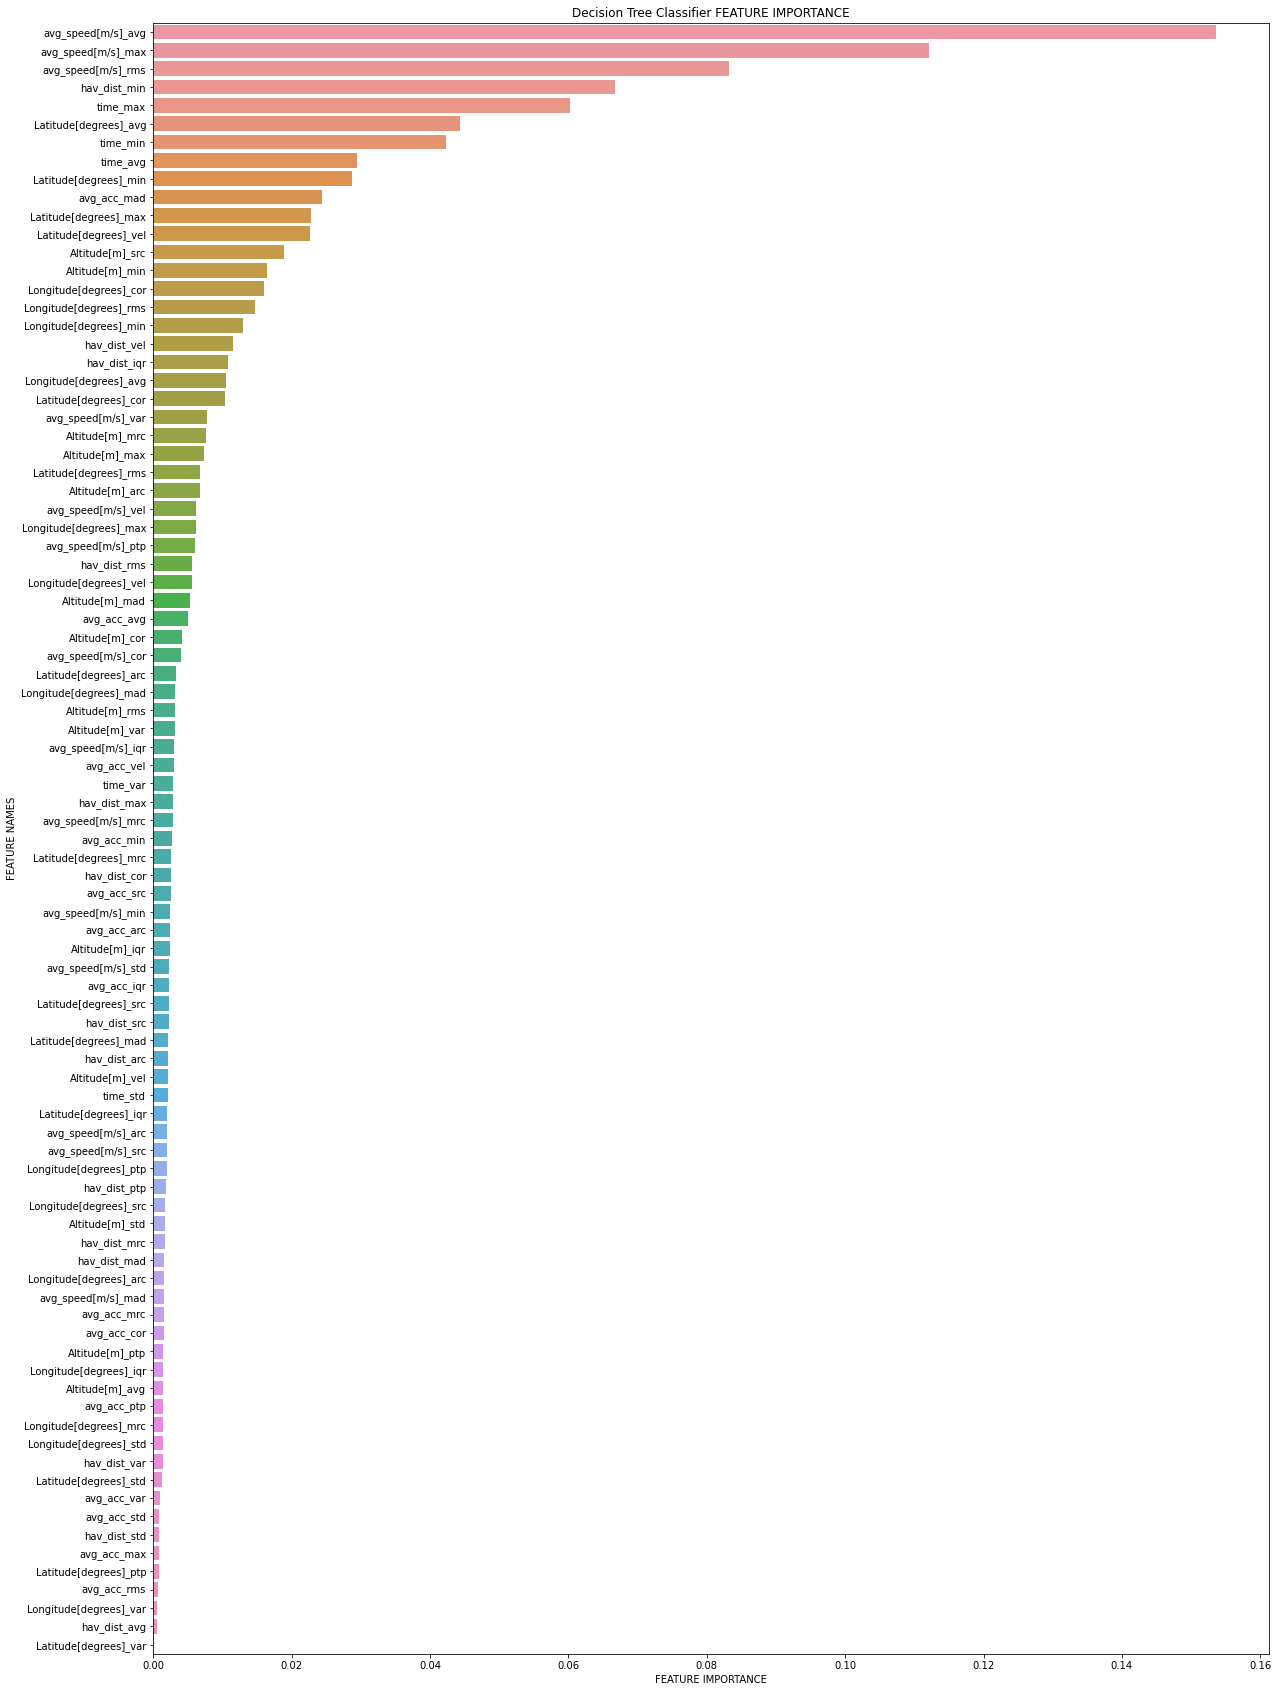

In [ ]:
plot_feature_importance(clf3.feature_importances_,columns,'Decision Tree Classifier')

# 4. Extra Tree Classifier


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf4= ExtraTreesClassifier()
scoring = 'accuracy'
#score = cross_val_score(clf4, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
#print(score)

clf4.fit(x_train,y_train)

train_pred=clf4.predict(x_train)
print(f1_score(y_train, train_pred,average='weighted'))

test_pred=clf4.predict(x_val)
print(f1_score(y_val, test_pred,average='weighted'))

print(accuracy_score(y_val,test_pred))

print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_val, test_pred))

1.0
0.7343560250981935
0.7357780912082745
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1716
         2.0       1.00      1.00      1.00      3522
         3.0       1.00      1.00      1.00      1397
         4.0       1.00      1.00      1.00      3860
         5.0       1.00      1.00      1.00      4084
         6.0       1.00      1.00      1.00      3975
         7.0       1.00      1.00      1.00      2305
         8.0       1.00      1.00      1.00      1177

    accuracy                           1.00     22036
   macro avg       1.00      1.00      1.00     22036
weighted avg       1.00      1.00      1.00     22036

              precision    recall  f1-score   support

         1.0       0.86      0.80      0.83       342
         2.0       0.93      0.80      0.86       516
         3.0       0.27      0.87      0.42        30
         4.0       0.81      0.44      0.57       355
         5.0       0.60      0.94   

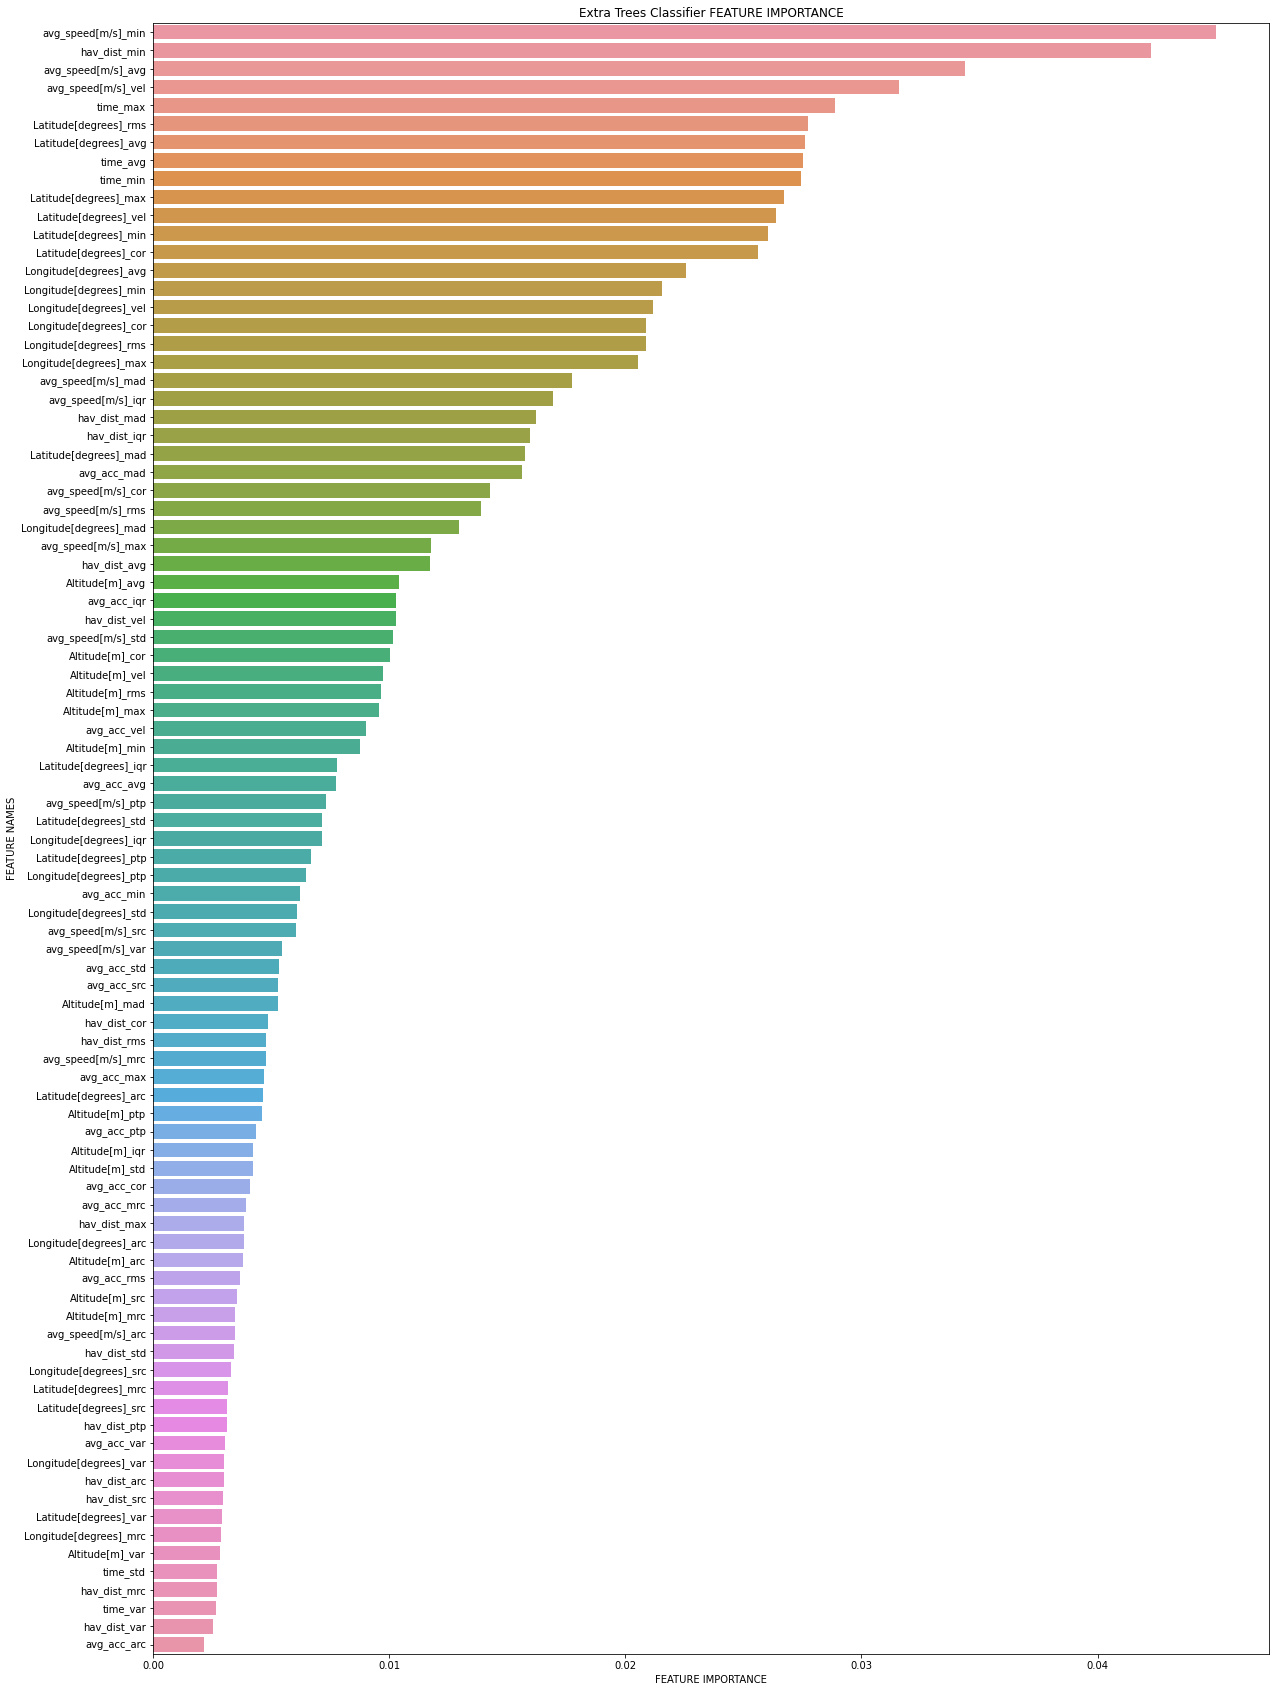

In [ ]:
plot_feature_importance(clf4.feature_importances_,columns,'Extra Trees Classifier')

# 5. AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf5= AdaBoostClassifier(n_estimators=100)
scoring = 'accuracy'
#score = cross_val_score(clf5, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
#print(score)

clf5.fit(x_train,y_train)

train_pred=clf5.predict(x_train)
print(f1_score(y_train, train_pred,average='weighted'))

test_pred=clf5.predict(x_val)
print(f1_score(y_val, test_pred,average='weighted'))

print(accuracy_score(y_val,test_pred))

print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_val, test_pred))

0.20486496282341346
0.26813837477970254
0.4000940291490362
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      1716
         2.0       0.46      0.80      0.59      3522
         3.0       0.00      0.00      0.00      1397
         4.0       0.29      0.96      0.44      3860
         5.0       0.00      0.00      0.00      4084
         6.0       0.00      0.00      0.00      3975
         7.0       0.27      0.02      0.04      2305
         8.0       0.39      0.93      0.55      1177

    accuracy                           0.35     22036
   macro avg       0.18      0.34      0.20     22036
weighted avg       0.17      0.35      0.20     22036

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       342
         2.0       0.51      0.87      0.64       516
         3.0       0.00      0.00      0.00        30
         4.0       0.29      0.85      0.43       355
         5.0       

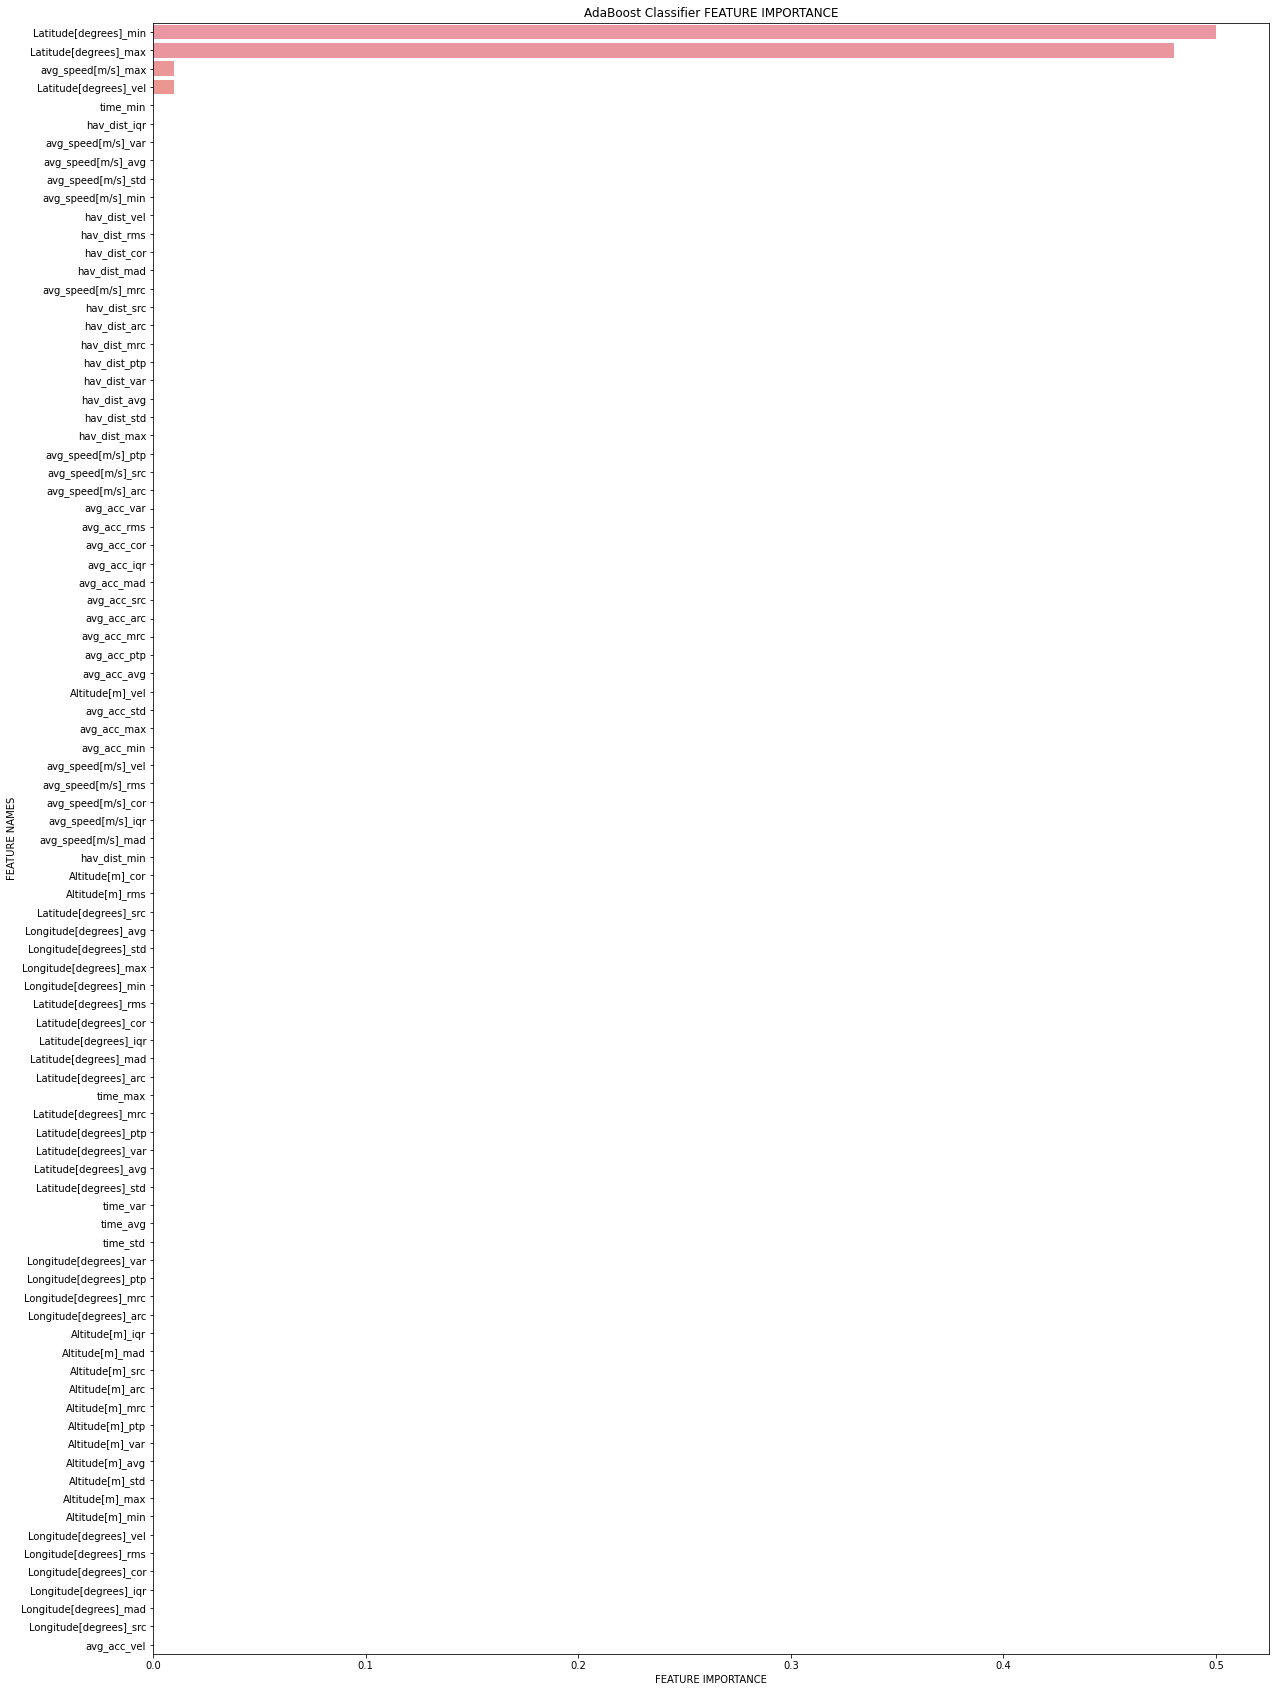

In [ ]:
plot_feature_importance(clf5.feature_importances_,columns,'AdaBoost Classifier')

# 6. CatBoost Classifier

In [ ]:
!pip3 install catboost
from catboost import CatBoostClassifier
clf6= CatBoostClassifier(learning_rate=0.01)
scoring = 'accuracy'
#score = cross_val_score(clf6, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
clf6.fit(x_train,y_train)
train_pred=clf6.predict(x_train)
test_pred=clf6.predict(x_val)

In [ ]:
print(f1_score(y_train, train_pred,average='weighted'))
print(f1_score(y_val, test_pred,average='weighted'))
print(accuracy_score(y_val,test_pred))
print(metrics.classification_report(y_train, train_pred))
print(metrics.classification_report(y_val, test_pred))

0.917682796995909
0.7249917931121599
0.7541137752703339
              precision    recall  f1-score   support

         1.0       0.88      0.92      0.90      1716
         2.0       0.95      0.95      0.95      3522
         3.0       0.95      0.89      0.92      1397
         4.0       0.88      0.90      0.89      3860
         5.0       0.95      0.91      0.93      4084
         6.0       0.86      0.93      0.89      3975
         7.0       0.97      0.86      0.92      2305
         8.0       0.97      0.98      0.97      1177

    accuracy                           0.92     22036
   macro avg       0.93      0.92      0.92     22036
weighted avg       0.92      0.92      0.92     22036

              precision    recall  f1-score   support

         1.0       0.79      0.92      0.85       342
         2.0       0.91      0.86      0.89       516
         3.0       0.30      0.80      0.44        30
         4.0       0.83      0.71      0.77       355
         5.0       0.6

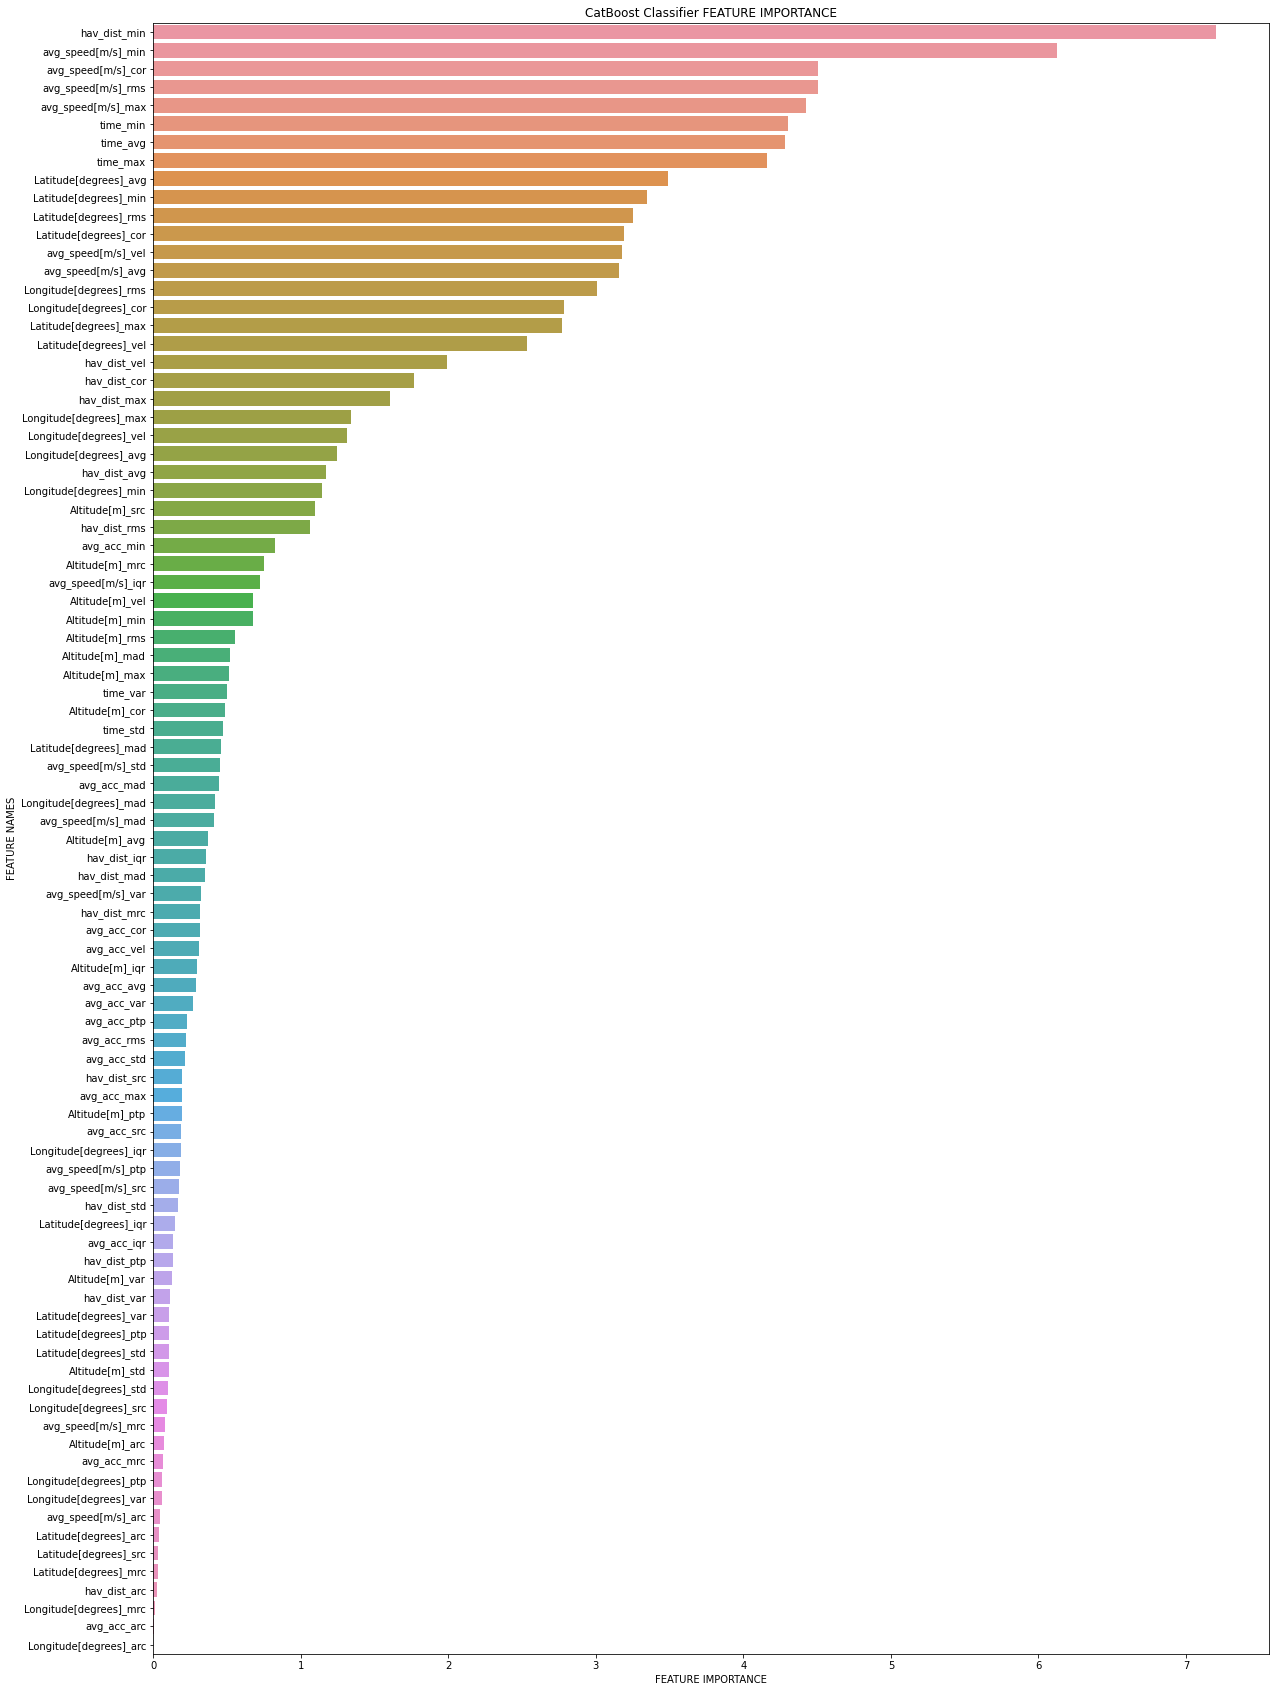

In [ ]:
plot_feature_importance(clf6.feature_importances_,columns,'CatBoost Classifier')

# TEST

In [ ]:
path_test = '/content/drive/MyDrive/SHL 2021/Test/Location/Location- gonna give label.csv'
fe3 = feature_extraction(path_test, window_len=30, overlap=0,up=0)
features = fe3.extract(labelled=False)

Calculating acc Axis Features : 100%|██████████| 15441/15441 [00:09<00:00, 1544.38it/s]


In [ ]:
df_test = pd.DataFrame(features)
column_names='time_min time_max time_std time_avg time_var \
              Latitude[degrees]_min Latitude[degrees]_max Latitude[degrees]_std Latitude[degrees]_avg Latitude[degrees]_var Latitude[degrees]_ptp Latitude[degrees]_mrc Latitude[degrees]_arc Latitude[degrees]_src Latitude[degrees]_mad Latitude[degrees]_iqr Latitude[degrees]_cor Latitude[degrees]_rms Latitude[degrees]_vel \
              Longitude[degrees]_min Longitude[degrees]_max Longitude[degrees]_std Longitude[degrees]_avg Longitude[degrees]_var Longitude[degrees]_ptp Longitude[degrees]_mrc Longitude[degrees]_arc Longitude[degrees]_src Longitude[degrees]_mad Longitude[degrees]_iqr Longitude[degrees]_cor Longitude[degrees]_rms Longitude[degrees]_vel \
              Altitude[m]_min Altitude[m]_max Altitude[m]_std Altitude[m]_avg Altitude[m]_var Altitude[m]_ptp Altitude[m]_mrc Altitude[m]_arc Altitude[m]_src Altitude[m]_mad Altitude[m]_iqr Altitude[m]_cor Altitude[m]_rms Altitude[m]_vel \
              hav_dist_min hav_dist_max hav_dist_std hav_dist_avg hav_dist_var hav_dist_ptp hav_dist_mrc hav_dist_arc hav_dist_src hav_dist_mad hav_dist_iqr hav_dist_cor hav_dist_rms hav_dist_vel \
              avg_speed[m/s]_min avg_speed[m/s]_max avg_speed[m/s]_std avg_speed[m/s]_avg avg_speed[m/s]_var avg_speed[m/s]_ptp avg_speed[m/s]_mrc avg_speed[m/s]_arc avg_speed[m/s]_src avg_speed[m/s]_mad avg_speed[m/s]_iqr avg_speed[m/s]_cor avg_speed[m/s]_rms avg_speed[m/s]_vel \
              avg_acc_min avg_acc_max avg_acc_std avg_acc_avg avg_acc_var avg_acc_ptp avg_acc_mrc avg_acc_arc avg_acc_src avg_acc_mad avg_acc_iqr avg_acc_cor avg_acc_rms avg_acc_vel'
df_test.columns = column_names.split()
fill_mean = lambda col : col.fillna(col.mean())
df_test= df_test.apply(fill_mean, axis = 0)

In [ ]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [ ]:
x_test=df_test.values
y_pred=clf1.predict(x_test)

#Final Prediction

In [ ]:
y_pred_ext=[]
for i in range(len(y_pred)):
  for j in range(30):
    y_pred_ext.append(y_pred[i])

import collections
elements_count = collections.Counter(y_pred)
for key, value in elements_count.items():
   print(f"{key}: {value}") 

5.0: 8639
2.0: 2121
3.0: 204
1.0: 818
4.0: 1381
6.0: 284
7.0: 1332
8.0: 662


In [ ]:
b=len(location_test)-len(y_pred_ext)
print(b)
for i in range(0,b):
  y_pred_ext.append(5)

prediction=list(y_pred_ext)
print('prediction length:    ',len(prediction))
print('location test length: ',len(location_test))  

2
prediction length:     463232
location test length:  463232


In [ ]:
from pandas import DataFrame
location_prediction=DataFrame(prediction,columns=['Location_Prediction'])
location_prediction.to_csv("/content/drive/MyDrive/SHL 2021/Test/Label/Location_Prediction.csv",index=False)